In [44]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset

df = pd.read_csv("MOCK_DATA.csv")
df.head()


,customer_id,age,income,purchase_history,customer_spending_score,freq_of_visit,gender,region,customer_type
0,1,59,29889,19524,59,75,Male,East,budget
1,2,43,105494,42714,66,43,Female,East,budget
2,3,47,107857,12129,61,23,Male,East,budget
3,4,31,113408,11521,74,71,Female,West,regular
4,5,31,95612,485,76,99,Agender,North,premium


In [45]:
df.columns

Index(['customer_id', 'age', 'income', 'purchase_history',
       'customer_spending_score', 'freq_of_visit', 'gender', 'region',
       'customer_type'],
      dtype='object')

In [46]:
# age, purchase_history, freq_of_visit, 

In [47]:
col = ['age', 'income', 'purchase_history','customer_spending_score', 'freq_of_visit', 'gender', 'region', 'customer_type']

In [48]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['region'] = le.fit_transform(df['region'])
df['customer_type'] = le.fit_transform(df['customer_type'])


In [49]:
df[col].head()

,age,income,purchase_history,customer_spending_score,freq_of_visit,gender,region,customer_type
0,59,29889,19524,59,75,5,0,0
1,43,105494,42714,66,43,2,0,0
2,47,107857,12129,61,23,5,0,0
3,31,113408,11521,74,71,2,3,2
4,31,95612,485,76,99,0,1,1


In [50]:
from sklearn.preprocessing import MinMaxScaler


X = df[col].values

# Standardize the dataset
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Get the cluster centers and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [51]:
set(labels)

{0, 1, 2}

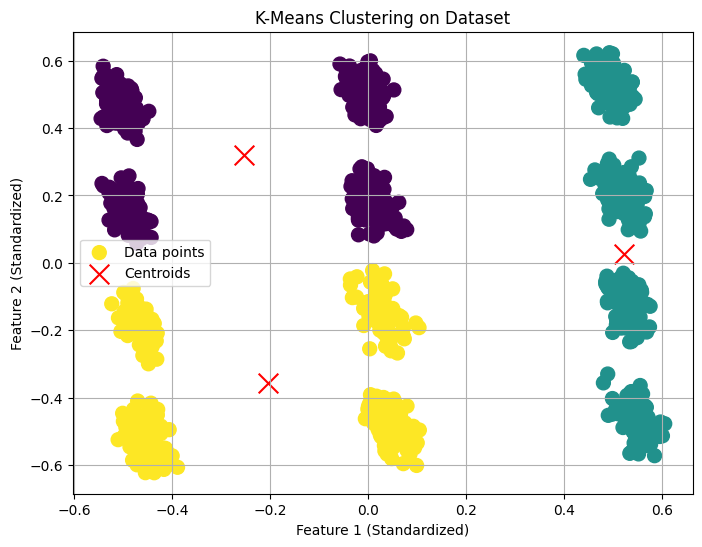

In [52]:

# Visualize the clustered data using the first two features
plt.figure(figsize=(8,6))

# Scatter plot of the data points colored by cluster label
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', s=100, label="Data points")

# Plot the centroids on the same plot
# centroids_pca = pca.transform(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label="Centroids")

# Adding title and labels
plt.title('K-Means Clustering on Dataset')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [53]:
kmeans.score(X_pca) #within-cluster sum of squares WCSS

-108.57938039755317

In [54]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_pca, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.4587801450918174
